<a href="https://colab.research.google.com/github/ykjoy/mining/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석 (Clustering) 




## k-means 군집 분석 
* 데이터의 어떤 영역을 대표하는 군집 중심을 찾는 방법으로 다음 두 단계를 반복하여 k개의 군집을 만든다. 
  * 단계 1: 데이터 포인트를 가장 가까운 군집 중심에 할당한다.
  * 단계 2: 군집에 할당된 데이터 포인트의 평균으로 군집 중심을 다시 지정한다. 
* k개의 중심점을 무작위로 초기화하여 시작하고 더이상 중심점의 이동이 없을 경우 반복을 멈춘다.

* KMeans 파라미터 
  * n_clusters : 군집의 개수 (기본 8)
  * init : k-means++ (기본), random
  * n_init : 초기 중심위치 시도 횟수 (기본 10, 무작위 중심위치 목록 10개 중 가장 좋은 값 선택)
  * max_iter : 최대 반복 횟수 (기본 300)
  * random_state : 시드값

In [1]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import mglearn

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=8198aff394ec986207dc67c8986a389cf6e6e7bb4c95932aa9eba90754cc74df
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.1 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


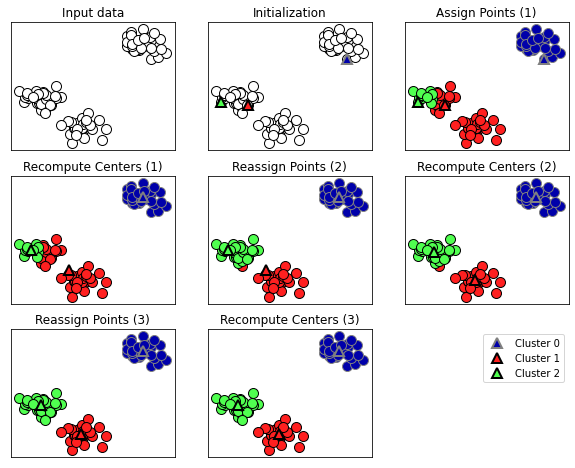

In [2]:
mglearn.plots.plot_kmeans_algorithm()

**k-means 군집분석의 장단점**
* 이해하기 쉽고 구현이 간단하여 가장 많이 사용됨
* 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (차원 감소 필요)
* 무작위로 초기화하기 때문에 시작점에 따라 결과가 달라지며, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
* 군집의 모양을 가정하고 있어 활용 범위가 비교적 제한적임 
* 군집의 수(k)를 미리 선택해야 하는데 가이드하기 어려움 


In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터 생성
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=0)
print(X)
print(y)

[[ 2.63185834  0.6893649 ]
 [ 0.08080352  4.69068983]
 [ 3.00251949  0.74265357]
 [-0.63762777  4.09104705]
 [-0.07228289  2.88376939]
 [ 0.62835793  4.4601363 ]
 [-2.67437267  2.48006222]
 [-0.57748321  3.0054335 ]
 [ 2.72756228  1.3051255 ]
 [ 0.34194798  3.94104616]
 [ 1.70536064  4.43277024]
 [ 2.20656076  5.50616718]
 [ 2.52092996 -0.63858003]
 [ 2.50904929  5.7731461 ]
 [-2.27165884  2.09144372]
 [ 3.92282648  1.80370832]
 [-1.62535654  2.25440397]
 [ 0.1631238   2.57750473]
 [-1.59514562  4.63122498]
 [-2.63128735  2.97004734]
 [-2.17052242  0.69447911]
 [-1.56618683  1.74978876]
 [-0.88677249  1.30092622]
 [ 0.08848433  2.32299086]
 [ 0.9845149   1.95211539]
 [ 2.18217961  1.29965302]
 [ 1.28535145  1.43691285]
 [ 0.89011768  1.79849015]
 [-1.89608585  2.67850308]
 [-0.75511346  3.74138642]
 [ 1.12031365  5.75806083]
 [ 3.54351972  2.79355284]
 [ 1.64164854  0.15020885]
 [ 2.47034915  4.09862906]
 [-1.98243652  2.93536142]
 [ 0.85624076  3.86236175]
 [ 0.87305123  4.71438583]
 

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [5]:
#X 데이터 각각에 할당된 군집 레이블 (0~2까지 3개의 군집 중에 할당됨)
print(kmeans.labels_)

[1 2 1 0 0 2 0 0 1 2 2 2 1 2 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 2 1 1 2 0 2 2
 1 1 0 0 1 1 2 2 2 1 1 0 0 2 1 2 1 0 0 1 1 2 1 1 0 0 0 0 1 2 0 1 2 0 1 0 1
 2 2 2 2 0 1 2 2 1 2 2 2 2 2 1 2 1 1 0 0 0 0 2 2 0 0]


In [6]:
# 군집 예측 결과는 위의 군집 레이블과 동일함
print(kmeans.predict(X))

[1 2 1 0 0 2 0 0 1 2 2 2 1 2 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 2 1 1 2 0 2 2
 1 1 0 0 1 1 2 2 2 1 1 0 0 2 1 2 1 0 0 1 1 2 1 1 0 0 0 0 1 2 0 1 2 0 1 0 1
 2 2 2 2 0 1 2 2 1 2 2 2 2 2 1 2 1 1 0 0 0 0 2 2 0 0]


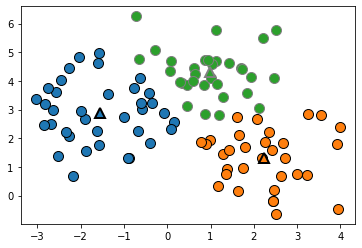

In [7]:
# 산점도로 군집을 나타내는데, 군집의 중심점을 삼각형으로 표시
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show()

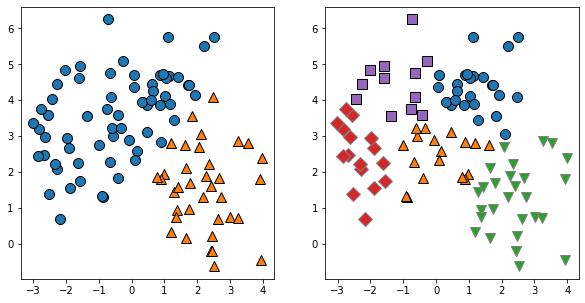

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심 사용
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심 사용
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

### 엘보우(elbow) 방법을 사용하여 최적의 군집 개수 찾기
* 군집내에서 데이터와 중심점까지의 거리의 제곱합 (inertia 관성값 또는 distortion 왜곡값이라고 불림)이 작을수록 좋은 군집임 
* inertia 값이 팔꿈치 모양으로 꺽이면서 줄어드는 지점의 군집의 개수 k를 선택


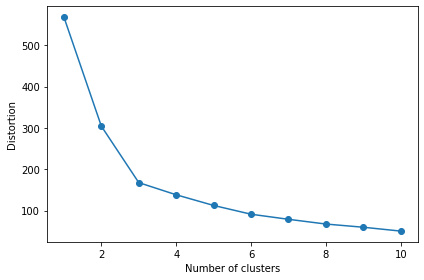

In [9]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## 다양한 형태의 군집

* k-means 군집 분석은 군집이 원형으로 나타나고 군집의 반경이 같다는 가정을 한다. 
* 군집마다 밀도가 다른 경우, 원형이 아닌 경우 등에서는 k-means 알고리즘이 군집을 잘 구분하지 못한다.  


* 다양한 군집 분석 알고리즘: k-means, Affinity propagation, Mean-shift, Spectral clustering, Ward hierarchical clustering, Agglomerative clustering, DBSCAN, OPTICS, Gaussican mixtures, Birch 
* 참고
  * https://scikit-learn.org/stable/modules/clustering.html
  * https://scikit-learn.org/stable/auto_examples/index.html#clustering



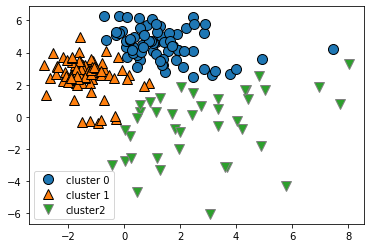

In [10]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=0)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster2"], loc='best')
plt.show()

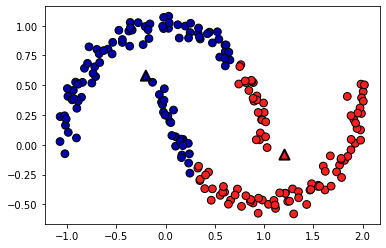

In [11]:
# 초승달 모양 클러스터를 가진 가상 데이터 생성(노이즈 추가)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘 적용
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심 표시
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.show()

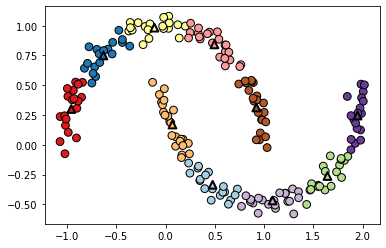

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.show()

In [13]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)
print(y_pred) 

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


## 군집 평가
대부분의 군집분석은 비교하여 평가할 만한 타겟값을 가지고 있지 않기 때문에 정확하게 성능을 평가하기는 어렵다. 군집화가 효율적으로 잘 되었는지 평가하기 위한 대표적인 방법은 다음과 같다. 

* 오차 제곱합 : 군집 내의 모든 데이터로부터 중심까지의 거리(오차)의 제곱합 
* 데이비스-볼딘 지수 (Davies-Bouldin index)
* 실루엣 계수 (Silhouette coefficient)
* Rand index (ARI), Mutual Information based scores (NMI, AMI),Homogeneity, completeness and V-measure, Fowlkes-Mallows scores (FMI), Calinski-Harabasz Index,  Contingency Matrix, Pair Confusion Matrix
* 참고: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### 데이비스-볼딘 지수
* 군집 내의 분리도와 군집 간의 분리도의 비율
* 지수값이 작을수록 좋은 군집 결과임 (군집 내의 분리도는 낮고 군집간의 분리도는 높음)

In [14]:
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
davies_bouldin_score(X, labels)

0.8691563208067805

### 실루엣 계수

* 군집의 밀집 정도 
  * s = (b - a) / max(a, b)
  * a: 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
  * b: 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 
  * -1에서 1 사이 값을 가지며 1에 가까울수록 좋은 군집 결과를 나타낸다. (-1은 잘못된 군집, 0은 중첩 군집)
* 전체 실루엣 계수 뿐 아니라 개별 군집의 평균값의 편차가 크지 않아야 한다.(전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값이 유난히 높고 다른 군집들의 실루엣 계수 평균값이 낮으면 좋은 군집화 조건이 아니다.) 
* 데이터의 형태가 복잡한 경우에는 실루엣 계수를 이용한 평가가 잘 맞지 않을 수 있다. 
* 실루엣 계수가 높다 하더라도 군집에 어떤 유의미한 것이 있는 또는 군집이 데이터의 흥미로운 면을 반영하고 있는지 알기 위해서는 군집을 직접 확인해야 한다. 




In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score 

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# 개별 데이터에 실루엣 계수값을 구함
score_samples = silhouette_samples(X, labels)
print('silhouette_samples() return 값의 shape', score_samples.shape)

# 전체에 대한 군집 번호, 실루엣 계수 컬럼 추가
X_new = np.c_[X, labels, score_samples]
print('개별 데이터의 실루엣 계수값:\n', X_new)

average_score = silhouette_score(X, labels)
print('모든 데이터의 평균 실루엣 계수값:', format(average_score)) 

silhouette_samples() return 값의 shape (200,)
개별 데이터의 실루엣 계수값:
 [[ 0.81680544  0.5216447   1.          0.43238841]
 [ 1.61859642 -0.37982927  2.          0.6454033 ]
 [-0.02126953  0.27372826  1.          0.16808492]
 [-1.02181041 -0.07543984  0.          0.43984374]
 [ 1.76654633 -0.17069874  2.          0.65707713]
 [ 1.8820287  -0.04238449  2.          0.63697751]
 [ 0.97481551  0.20999374  1.          0.15149283]
 [ 0.88798782 -0.48936735  2.          0.21969746]
 [ 0.89865156  0.36637762  1.          0.32766516]
 [ 1.11638974 -0.53460385  2.          0.44063979]
 [-0.36380036  0.82790185  0.          0.56085655]
 [ 0.24702417 -0.23856676  1.          0.45893296]
 [ 1.81658658 -0.13088387  2.          0.6523839 ]
 [ 1.2163905  -0.40685761  2.          0.51390857]
 [-0.8236696   0.64235178  0.          0.6724217 ]
 [ 0.98065583  0.20850838  1.          0.14217063]
 [ 0.54097175  0.88616823  1.          0.38463158]
 [ 0.348031   -0.30101351  1.          0.402752  ]
 [ 0.35181497  0.888

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


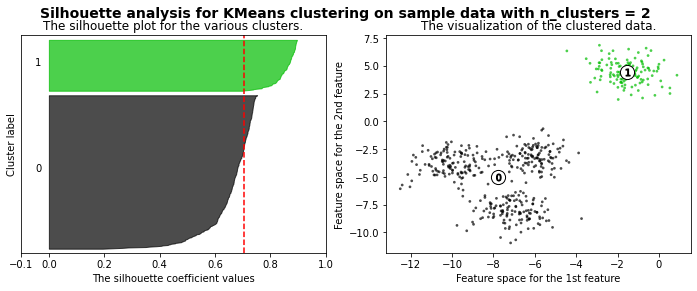

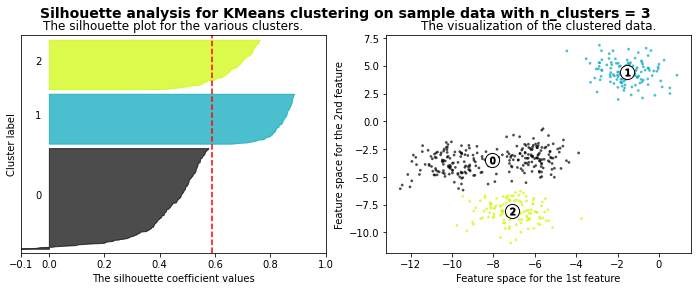

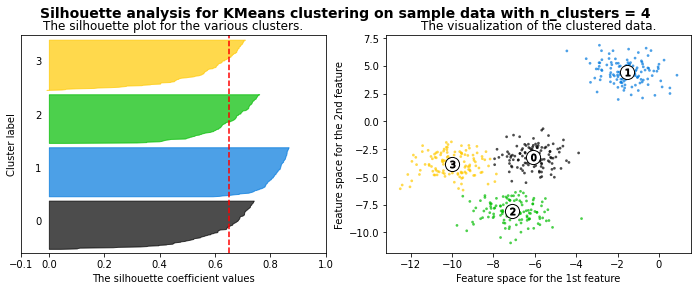

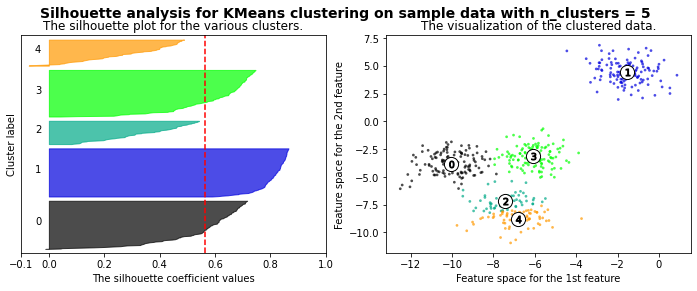

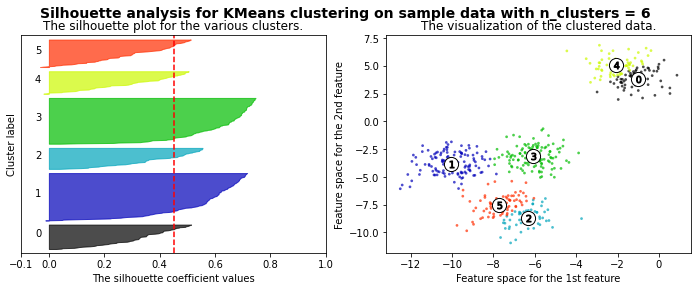

In [16]:
# 실루엣 계수 시각화
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12,4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to  cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## 고객 데이터를 이용한 군집분석 

### 데이터 준비
고객의 개인 정보(성별, 나이, 연봉)와 쇼핑 정보(쇼핑 점수)를 이용하여 유사한 특성을 지닌 고객들로 군집을 만들어보자. 

- 스노우보드에서 Mall_Customers.csv 화일을 다운로드 받아 Google Drive의 My Drive/Colab Notebooks/ITB 폴더에 올리기 
- https://www.kaggle.com/akram24/mall-customers
- 분석에 사용할 데이터 정보
 * CustomerID: 고객 아이디
 * Genre (Female/Male),  Age, Annual Income (k$), Spending Score (1-100) 

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# csv 데이터 가져오기
mall = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/Mall_Customers.csv")
mall.head()      # 처음 5행 확인

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
#Replacing objects for numerical values
mall['Gender'].replace(['Female','Male'], [0,1],inplace=True)
mall.rename(index=str, columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'}, inplace=True) 

#inplace는 클립보드 실행인지 저장인지 지정 
mall.head()

,CustomerID,Gender,Age,Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


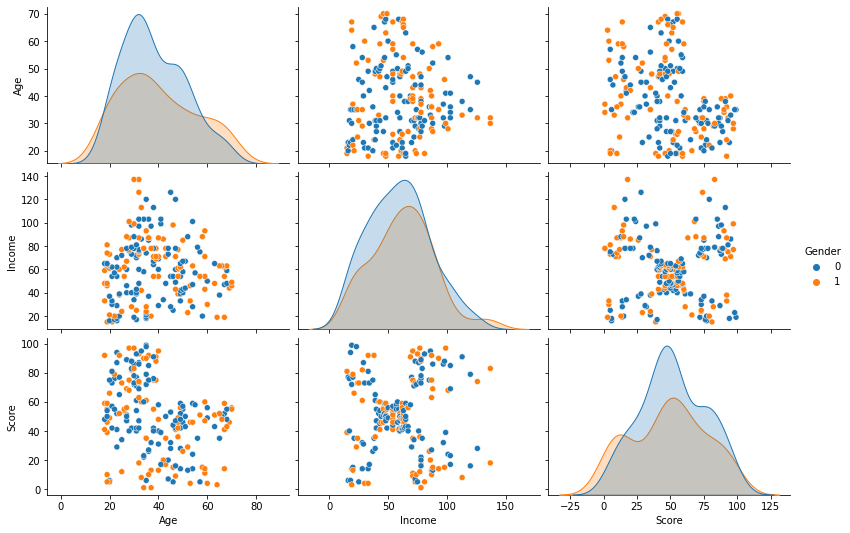

In [22]:
# 산점도를 이용하여 데이터 탐색
sns.pairplot(mall.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()
# 성별에 따라 데이터의 차이가 없으므로 Gender 변수를 분석에 사용하지 않음 
X = mall.drop(['CustomerID', 'Gender'], axis=1)

### k-mean 군집 분석 

In [23]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#X_scaled = StandardScaler().fit_transform(X)
#X_scaled = MinMaxScaler().fit_transform(X)

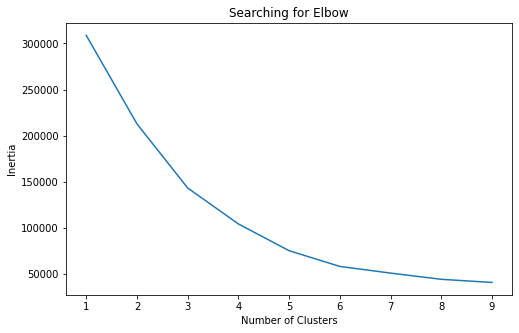

In [24]:
clusters =[]
for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.show() # 3 또는 5 중에서 선택

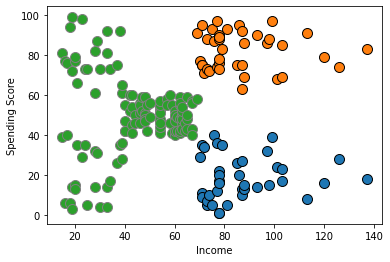

모든 데이터의 평균 실루엣 계수값: 0.3839349967742105
데이비스-볼딘지수: 0.8748062648492884


In [25]:
km3 = KMeans(n_clusters=3, random_state=0).fit(X)
labels = km3.labels_

mglearn.discrete_scatter(X['Income'], X['Score'],labels , markers='o')
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

average_score = silhouette_score(X, labels)
print('모든 데이터의 평균 실루엣 계수값:', format(average_score)) 

dv = davies_bouldin_score(X, labels)
print('데이비스-볼딘지수:', format(dv)) 

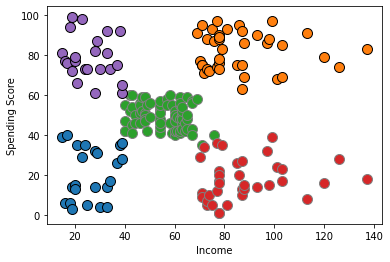

모든 데이터의 평균 실루엣 계수값: 0.44428597560893024
데이비스-볼딘지수: 0.8218781633199781


In [26]:
km5 = KMeans(n_clusters=5, random_state=0).fit(X)
labels = km5.labels_

mglearn.discrete_scatter(X['Income'], X['Score'],labels , markers='o')
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

average_score = silhouette_score(X, labels)
print('모든 데이터의 평균 실루엣 계수값:', format(average_score)) 

dv = davies_bouldin_score(X, labels)
print('데이비스-볼딘지수:', format(dv)) 